In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset_train=pd.read_csv("d_train.csv")
dataset_test=pd.read_csv("d_test.csv")

In [16]:
y_train=dataset_train["label"]
x_train=dataset_train.drop(["label"],axis=1)

In [17]:
x_test=dataset_test

In [18]:
x_train.shape

(42000, 784)

In [19]:
x_test.shape

(28000, 784)

In [20]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
y_train.shape

(42000,)

In [22]:
x_train=x_train.values.reshape(-1,28,28,1)
x_test=x_test.values.reshape(-1,28,28,1)

In [23]:
x_test.shape

(28000, 28, 28, 1)

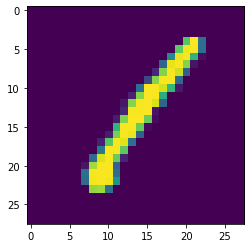

In [24]:
g=plt.imshow(x_train[0][:,:,0])

In [25]:
x_train=x_train/255.0
x_test=x_test/255.0

In [26]:
##x_train=pd.DataFrame.from_records(x_train)
##x_test=pd.DataFrame.from_records(x_test)

In [30]:
from tensorflow.keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
y_train=y_train.to_numpy()


In [38]:
model.fit(x_train, y_train, epochs=5)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 46s 1ms/sample - loss: 0.1855 - accuracy: 0.9422
Epoch 2/5
42000/42000 [==============================] - 42s 1ms/sample - loss: 0.0564 - accuracy: 0.9827
Epoch 3/5
42000/42000 [==============================] - 43s 1ms/sample - loss: 0.0414 - accuracy: 0.9874
Epoch 4/5
42000/42000 [==============================] - 43s 1ms/sample - loss: 0.0310 - accuracy: 0.9906
Epoch 5/5
42000/42000 [==============================] - 42s 1ms/sample - loss: 0.0256 - accuracy: 0.9922


In [ ]:
acc,loss=model.evaluate(x_train.values,y_train.values)

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

In [ ]:
pred=np.argmax(pred,axis=1)
dict={'Label':pred}
submission=pd.DataFrame(dict)
submission.to_csv("digit high.csv")